In [1]:
from visualization import get_c2w_poses
from visualization import visualize_camera_poses
from visualization import visualize_rays
from dataset import get_rays

import torch
from torch.utils.data import DataLoader

In [2]:
height = 400
width = 400
batch_size = 1024

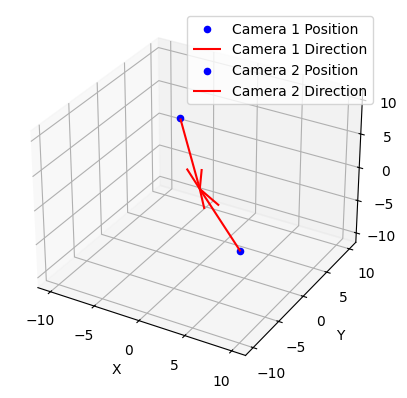

(array([[ 0.19760075,  0.96151125, -0.19091886, -1.90918863],
        [-0.98028266,  0.19381689, -0.03848452, -0.3848452 ],
        [ 0.        ,  0.19475907,  0.98085111,  9.80851078],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[-4.30372715e-01,  8.27480972e-01,  3.60630631e-01,
          3.60630631e+00],
        [ 9.02651370e-01,  3.94532382e-01,  1.71944097e-01,
          1.71944094e+00],
        [ 1.49011630e-08,  3.99523854e-01, -9.16722894e-01,
         -9.16722870e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]))

In [4]:
poses = get_c2w_poses(datapath='datasets/monkey_3', mode='train')
pose_tb = np.array([poses[99], poses[13]]) #, poses[14],poses[16]
visualize_camera_poses(pose_tb)
# poses[99], poses[13]

In [5]:
o, d, target_px_values = get_rays('datasets/creepy_monkey', mode='test')
dataloader = DataLoader(torch.cat((torch.from_numpy(o).reshape(-1, 3).type(torch.float),
                                   torch.from_numpy(d).reshape(-1, 3).type(torch.float),
                                   torch.from_numpy(target_px_values).reshape(-1, 3).type(torch.float)), dim=1),
                       batch_size=batch_size, shuffle=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


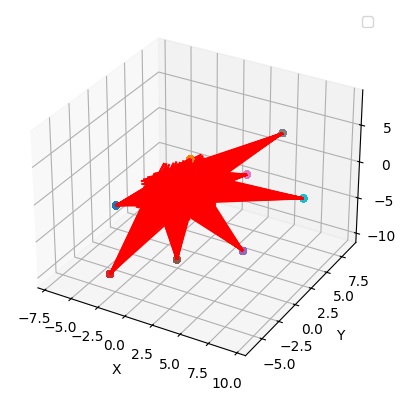

In [6]:
visualize_rays(origins=o, directions=-d, num_rays_to_sample_per_set=100)